# Importing  Important Liberaries 


the programe should be like this
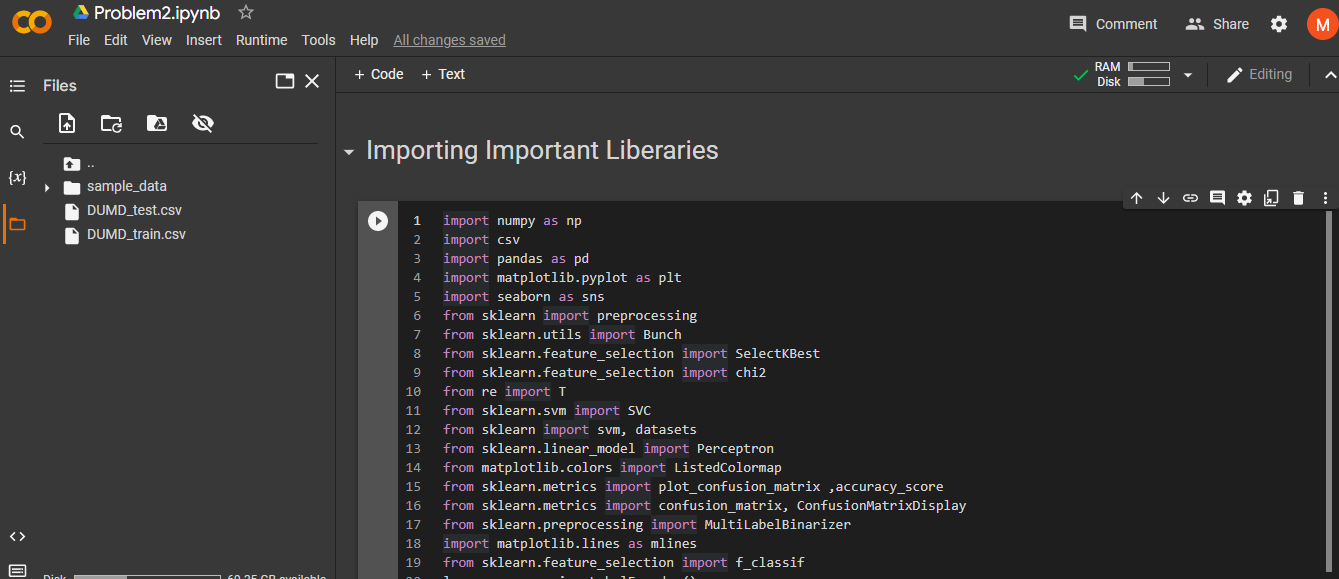

In [1]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.utils import Bunch
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from re import T
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.linear_model import Perceptron
from matplotlib.colors import ListedColormap
from sklearn.metrics import plot_confusion_matrix ,accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.lines as mlines
from sklearn.feature_selection import f_classif
le = preprocessing.LabelEncoder()


In [2]:
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g','yellow']
  markers = ['o', '*', '+','X']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "DUMD Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel(' PEG')
  plt.ylabel(' LPR ')
  plt.legend()

In [3]:
def plotDataOvR(features, labels, cls, class_names):
  colors = ['r', 'b' ]
  markers = ['o', '*']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "DUMD Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel(' PEG')
  plt.ylabel(' LPR ')
  plt.legend()

In [4]:
def plotRegions(model, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [5]:
#  PREPARATION FUNCTION

def load_dataset(dada):
    with open(dada) as csv_file:
        data_reader = csv.reader(csv_file)
        feature_names = next(data_reader)[:-1]
        data = []
        target = []
        for row in data_reader:
            features = row[:-1]
            label = row[-1]
            data.append([float(num) for num in features])
            target.append((label))
        
        data = np.array(data)
        target = np.array(target)
    return Bunch(data=data, target=target, feature_names=feature_names)

In [6]:
# ACCURACY FUNCTION

def getAccuracy(model, x, y):
  return model.score(x,y)*100

In [7]:
# ONE HOT ENCODER FUNCTION

def encode(arr):
  ylist = arr.tolist()
  yout = []
  i = 2
  for ele in ylist:
    
    if ele == 'Very Low':
      yout.append([0,0,0,1])
    elif ele == 'Low':
      yout.append([0,0,1,0])
    elif ele == 'Medium':
      yout.append([0,1,0,0])
    elif ele == 'High':
      yout.append([1,0,0,0])
    i=i+1
  youtf = np.array(yout)
  return youtf

In [8]:
# DETECTING THE WRONG CLASS PREDICTION DATA REGARDING POSITION IN TARGET DATA

def wrong(rong):
  mlist = rong.tolist()
  ytlist = y_ts.tolist()
  yout = []
  i = 0
  for ele in ytlist:
    
    if ele != mlist[i]:
      mlist[i]= 1
    else :
      mlist[i]= 0
    
    i=i+1
  mout = np.array(mlist)
  return mout

In [9]:
# LOAD DATASET AND ORGANIZING DATA

train_data =pd.read_csv('DUMD_train.csv')
test_data =pd.read_csv('DUMD_test.csv')



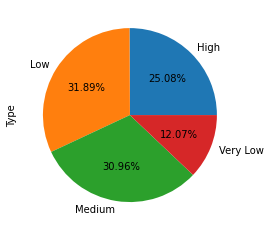

In [10]:
# visulising the class distribution
train_data.groupby("UNS").size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.2f%%')


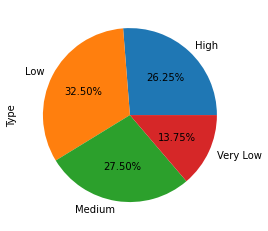

In [11]:
test_data.groupby("UNS").size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.2f%%')

In [12]:
# replacing the target label with a b c d so that it doesn't get mixed up with the LABELENCODER
train_data['UNS']=train_data['UNS'].replace({'very_low':'a',"Low":'b',"Middle":'c',"High":'d'})
test_data['UNS']=test_data['UNS'].replace({'Very_low':'a',"Low":'b',"Middle":'c',"High":'d'})

In [13]:
# EXCUTING THE LABELENCODER 
LE = preprocessing.LabelEncoder()
train_data["UNS"] = LE.fit_transform(train_data["UNS"])
test_data["UNS"] = LE.fit_transform(test_data["UNS"])


In [14]:
# EXTRACT THE MOST VALUABLE TWO FEATURES
# Score function Chi2 tells the feature to be selected using Chi Square
test = SelectKBest(score_func=f_classif, k=2)
fit = test.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
fit.scores_


array([  7.98709716,   5.92669075,   5.35222489,  15.02514254,
       633.67829829])

From the anova we found that LPR and PEG columns have the most impact on our target label 

In [15]:
# Spliting the data 
X_tr=train_data.iloc[:,3:5].values
y_tr= train_data.iloc[:,-1].values
y_tr = np.reshape(y_tr, (323,))
X_ts= test_data.iloc[:,3:5].values
y_ts= test_data.iloc[:,-1].values
y_ts = np.reshape(y_ts, (80,))


# Problem One

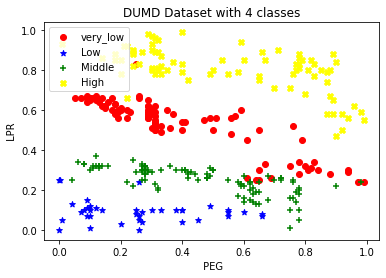

In [16]:
# ploting the data 
class_names={0: 'very_low', 1: 'Low', 2: 'Middle',3: 'High'}
cls_new=[0,1,2,3]
plotData(X_tr, y_tr, cls_new, class_names)
plt.legend(loc="upper left")

plt.show()

In [17]:
model = svm.SVC(kernel='rbf')
model.fit(X_tr, y_tr)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X_ts, y_ts)))

Accuracy of model: 98.75%


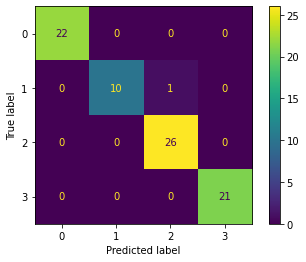

In [18]:
# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_ts, y_ts)

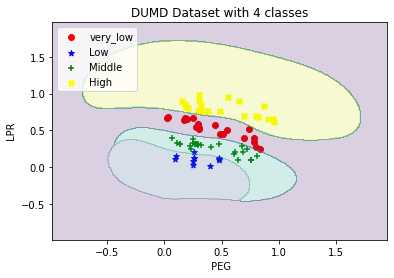

In [19]:
plotData(X_ts, y_ts, cls_new, class_names)
plotRegions(model, X_ts)
plt.legend(loc="upper left")
plt.show()

In [20]:
from sklearn.linear_model import Perceptron
p = Perceptron(random_state=42)
p.fit(X_tr, y_tr)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(p, X_ts, y_ts)))

Accuracy of model: 83.75%


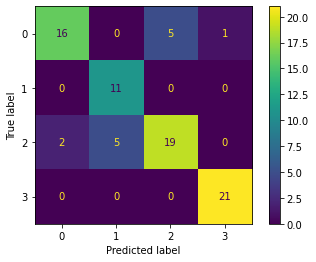

In [21]:
# Making the Confusion Matrix
ConfusionMatrixDisplay.from_estimator(p, X_ts, y_ts)

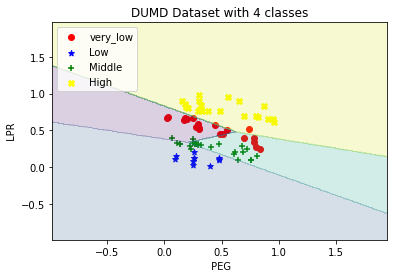

In [22]:
plotData(X_ts, y_ts, cls_new, class_names)
plotRegions(p, X_ts)
plt.legend(loc="upper left")
plt.show()

# Problem TWO

In [23]:
# EXCUTING THE ONE HOT LABELENCODER ['high' , 'middle' , 'low' , 'very low'] >>> [[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]]

ytrr = y_tr.reshape((-1,1))
ytt = y_ts.reshape((-1,1))

mlb = MultiLabelBinarizer()

ytr2 = mlb.fit_transform(ytrr)
yt2 = mlb.fit_transform(ytt)


In [24]:
# TRAIN CLS SEPARATION

yb1 =  np.reshape(ytr2[:,0], (323,))
yb2 = np.reshape(ytr2[:,1], (323,))
yb3 = np.reshape(ytr2[:,2], (323,))
yb4 = np.reshape(ytr2[:,3], (323,))

# TEST CLS SEPARATION

ytb1 = np.reshape(yt2[:,0], (80,))
ytb2 = np.reshape(yt2[:,1], (80,))
ytb3 = np.reshape(yt2[:,2], (80,))
ytb4 = np.reshape(yt2[:,3], (80,))

In [25]:
# OVR CLASSIFIERS AND THEIR ACCURACY

# CLF_1
clf_1 = svm.SVC(kernel='rbf', probability=True)
clf_1.fit(X_tr, yb1)
yb1_pred = clf_1.predict_proba(X_ts)[:,1].reshape(-1,1)

# CLF_2
clf_2 = svm.SVC(kernel='rbf', probability=True)
clf_2.fit(X_tr, yb2)
yb2_pred = clf_2.predict_proba(X_ts)[:,1].reshape(-1,1)

# CLF_3
clf_3 = svm.SVC(kernel='rbf', probability=True)
clf_3.fit(X_tr, yb3)
yb3_pred = clf_3.predict_proba(X_ts)[:,1].reshape(-1,1)

# CLF_4
clf_4 = svm.SVC(kernel='rbf', probability=True)
clf_4.fit(X_tr, yb4)
yb4_pred = clf_4.predict_proba(X_ts)[:,1].reshape(-1,1)

In [26]:
# MODELS ACCURACY 

print('Accuracy of high classifier: {:.2f}%'.format(getAccuracy(clf_1, X_ts, ytb1)))
print('Accuracy of low classifier : {:.2f}%'.format(getAccuracy(clf_2, X_ts, ytb2)))
print('Accuracy of medium classifier : {:.2f}%'.format(getAccuracy(clf_3, X_ts, ytb3)))
print('Accuracy of very low classifier : {:.2f}%'.format(getAccuracy(clf_4, X_ts, ytb4)))

Accuracy of high classifier: 100.00%
Accuracy of low classifier : 98.75%
Accuracy of medium classifier : 97.50%
Accuracy of very low classifier : 100.00%


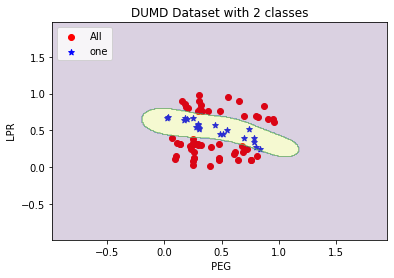

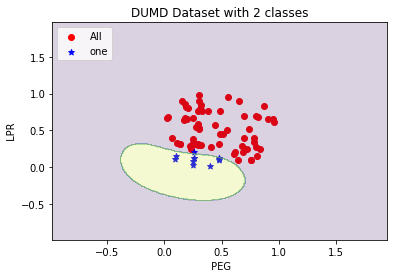

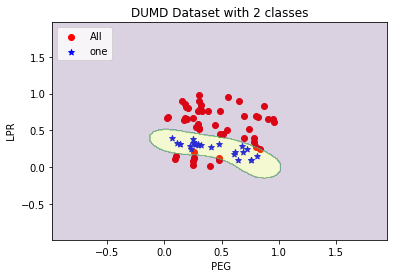

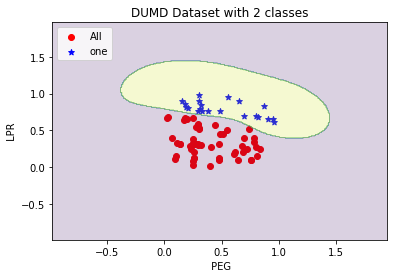

In [27]:
# DECISION BOUNDARIES FOR CLF_1
OvOclass_names={0: 'All', 1: 'one'}
plotDataOvR( X_ts, ytb1, [0,1], OvOclass_names)
plotRegions(clf_1, X_ts)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF_2
plotDataOvR( X_ts, ytb2,  [0,1], OvOclass_names)
plotRegions(clf_2, X_ts)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF_3
plotDataOvR( X_ts, ytb3,  [0,1],OvOclass_names)
plotRegions(clf_3, X_ts)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF_4
plotDataOvR( X_ts, ytb4,  [0,1], OvOclass_names)
plotRegions(clf_4, X_ts)
plt.legend(loc="upper left")
plt.show()


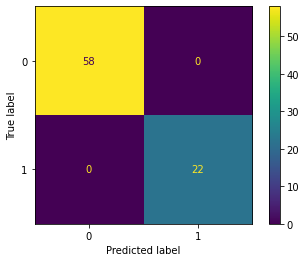

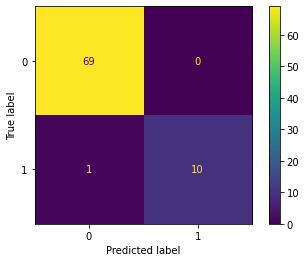

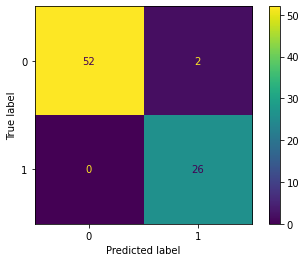

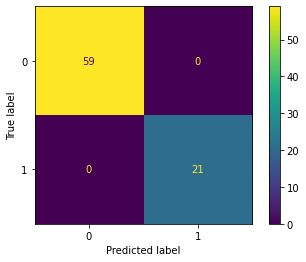

In [28]:
# Making the Confusion Matrix CLF_1
ConfusionMatrixDisplay.from_estimator(clf_1, X_ts, ytb1)
# Making the Confusion Matrix CLF_1
ConfusionMatrixDisplay.from_estimator(clf_2, X_ts, ytb2)
# Making the Confusion Matrix CLF_1
ConfusionMatrixDisplay.from_estimator(clf_3, X_ts, ytb3)
# Making the Confusion Matrix CLF_1
ConfusionMatrixDisplay.from_estimator(clf_4, X_ts, ytb4)

In [29]:
# ARGMAX

yb_all = np.hstack((yb1_pred, yb2_pred, yb3_pred, yb4_pred))

m = np.argmax(yb_all, axis=1)

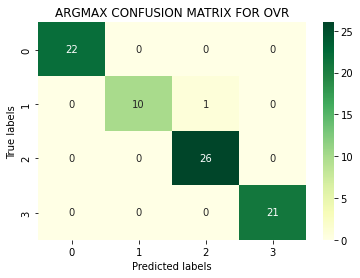

In [30]:
# PLOTING CONFUSION MATRIX

ax= plt.subplot()
cf_matrix = confusion_matrix(y_ts, m)
sns.heatmap(cf_matrix, annot=True, cmap='YlGn')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('ARGMAX CONFUSION MATRIX FOR OVR'); 


In [31]:
# ARGMAX ACCURACY 

print('Accuracy of Argmax: {:.2f}%'.format(accuracy_score(y_ts, m)*100))

Accuracy of Argmax: 98.75%


In [32]:
# CALLING THE DETECTING THE WRONG CLASS PREDICTION DATA REGARDING POSITION IN TARGET DATA FUNCTION

mout = wrong(m)

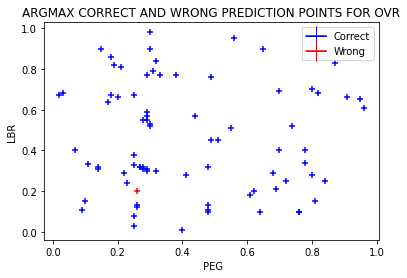

In [33]:
# PLOTING CORRECT AND WRONG PREDICTION POINTS

fig, ax = plt.subplots()
plt.scatter(X_ts[:,0],X_ts[:,1],
             marker="+",c=mout, cmap='bwr')
blue_line = mlines.Line2D([], [], color='blue', marker='+',
                          markersize=20, label='Correct')
red_line = mlines.Line2D([], [], color='red', marker='+',
                          markersize=20, label='Wrong')
plt.title('ARGMAX CORRECT AND WRONG PREDICTION POINTS FOR OVR')
plt.xlabel(' PEG')
plt.ylabel('LBR')
ax.legend(handles=[blue_line ,red_line])
plt.show()

# Problem three

In [34]:
# partion 0 1 
Masktr_0_1,Maskts_0_1=((y_tr==0)|(y_tr==1)),((y_ts==0)|(y_ts==1))
X_tr0_1 ,y_tr0_1,X_ts0_1 ,y_ts0_1=X_tr[Masktr_0_1] ,y_tr[Masktr_0_1],X_ts[Maskts_0_1] ,y_ts[Maskts_0_1]

# partion 0 2 
Masktr_0_2,Maskts_0_2=((y_tr==0)|(y_tr==2)),((y_ts==0)|(y_ts==2))
X_tr0_2 ,y_tr0_2,X_ts0_2 ,y_ts0_2=X_tr[Masktr_0_2] ,y_tr[Masktr_0_2],X_ts[Maskts_0_2] ,y_ts[Maskts_0_2]

# partion 0 3 
Masktr_0_3,Maskts_0_3=((y_tr==0)|(y_tr==3)),((y_ts==0)|(y_ts==3))
X_tr0_3 ,y_tr0_3,X_ts0_3 ,y_ts0_3=X_tr[Masktr_0_3] ,y_tr[Masktr_0_3],X_ts[Maskts_0_3] ,y_ts[Maskts_0_3]

# partion 1 2 
Masktr_1_2,Maskts_1_2=((y_tr==1)|(y_tr==2)),((y_ts==1)|(y_ts==2))
X_tr1_2 ,y_tr1_2,X_ts1_2 ,y_ts1_2=X_tr[Masktr_1_2] ,y_tr[Masktr_1_2],X_ts[Maskts_1_2] ,y_ts[Maskts_1_2]

# partion 1 3 
Masktr_1_3,Maskts_1_3=((y_tr==1)|(y_tr==3)),((y_ts==1)|(y_ts==3))
X_tr1_3 ,y_tr1_3,X_ts1_3 ,y_ts1_3=X_tr[Masktr_1_3] ,y_tr[Masktr_1_3],X_ts[Maskts_1_3] ,y_ts[Maskts_1_3]

# partion 2 3 
Masktr_2_3,Maskts_2_3=((y_tr==2)|(y_tr==3)),((y_ts==2)|(y_ts==3))
X_tr2_3 ,y_tr2_3,X_ts2_3 ,y_ts2_3=X_tr[Masktr_2_3] ,y_tr[Masktr_2_3],X_ts[Maskts_2_3] ,y_ts[Maskts_2_3]



In [35]:
# OVO CLASSIFIERS AND THEIR ACCURACY

# CLF0_1
clf_0_1 = svm.SVC(kernel='rbf', probability=True)
clf_0_1.fit(X_tr0_1, y_tr0_1)

# CLF0_2
clf_0_2 = svm.SVC(kernel='rbf', probability=True)
clf_0_2.fit(X_tr0_2, y_tr0_2)

# CLF0_3
clf_0_3 = svm.SVC(kernel='rbf', probability=True)
clf_0_3.fit(X_tr0_3, y_tr0_3)
# CLF 1_2
clf_1_2 = svm.SVC(kernel='rbf', probability=True)
clf_1_2.fit(X_tr1_2, y_tr1_2)

# CLF1_3
clf_1_3 = svm.SVC(kernel='rbf', probability=True)
clf_1_3.fit(X_tr1_3, y_tr1_3)
# CLF2_3
clf_2_3 = svm.SVC(kernel='rbf', probability=True)
clf_2_3.fit(X_tr2_3, y_tr2_3)
yb1_pred = clf_2_3.predict_proba(X_ts2_3)

In [36]:
print('Accuracy of 0 and 1 classifier: {:.2f}%'.format(getAccuracy(clf_0_1, X_ts0_1, y_ts0_1)))
print('Accuracy of 0 and 1 classifier: {:.2f}%'.format(getAccuracy(clf_0_2, X_ts0_2, y_ts0_2)))
print('Accuracy of 0 and 1 classifier: {:.2f}%'.format(getAccuracy(clf_0_3, X_ts0_3, y_ts0_3)))
print('Accuracy of 1 and 2 classifier: {:.2f}%'.format(getAccuracy(clf_1_2, X_ts1_2, y_ts1_2)))
print('Accuracy of 1 and 3 classifier: {:.2f}%'.format(getAccuracy(clf_1_3, X_ts1_3, y_ts1_3)))
print('Accuracy of 2 and 3 classifier: {:.2f}%'.format(getAccuracy(clf_2_3, X_ts2_3, y_ts2_3)))


Accuracy of 0 and 1 classifier: 100.00%
Accuracy of 0 and 1 classifier: 100.00%
Accuracy of 0 and 1 classifier: 100.00%
Accuracy of 1 and 2 classifier: 97.30%
Accuracy of 1 and 3 classifier: 100.00%
Accuracy of 2 and 3 classifier: 100.00%


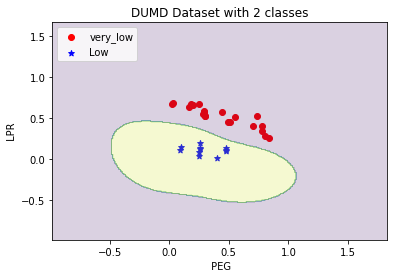

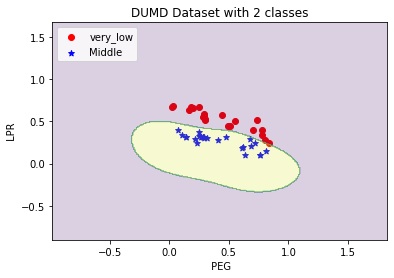

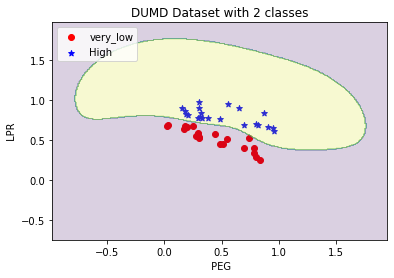

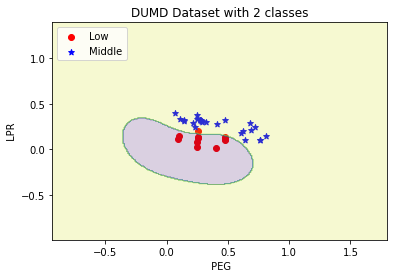

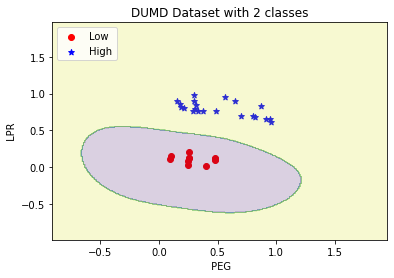

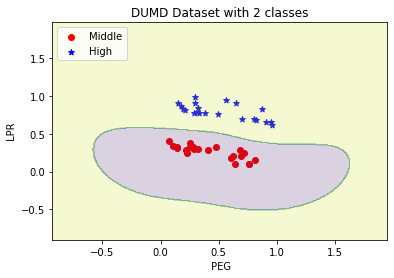

In [37]:
# DECISION BOUNDARIES FOR CLF0_1
plotData( X_ts0_1, y_ts0_1, [0,1], class_names)
plotRegions(clf_0_1, X_ts0_1)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF0_2
plotData(  X_ts0_2, y_ts0_2, [0,2], class_names)
plotRegions(clf_0_2, X_ts0_2)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF0_3
plotData(  X_ts0_3, y_ts0_3, [0,3], class_names)
plotRegions(clf_0_3, X_ts0_3)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF1_2
plotData(  X_ts1_2, y_ts1_2, [1,2], class_names)
plotRegions(clf_1_2, X_ts1_2)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF1_3
plotData(  X_ts1_3, y_ts1_3, [1,3], class_names)
plotRegions(clf_1_3, X_ts1_3)
plt.legend(loc="upper left")
plt.show()
# DECISION BOUNDARIES FOR CLF2_3
plotData(  X_ts2_3, y_ts2_3, [2,3], class_names)
plotRegions(clf_2_3, X_ts2_3)
plt.legend(loc="upper left")
plt.show()

Making the Confusion Matrix CLF0_1
Making the Confusion Matrix CLF0_2
Making the Confusion Matrix CLF0_3
Making the Confusion Matrix CLF1_2
Making the Confusion Matrix CLF1_3
Making the Confusion Matrix CLF2_3


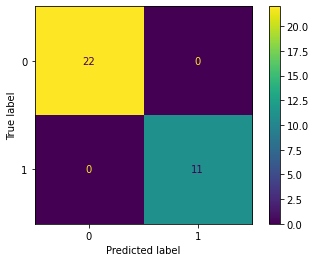

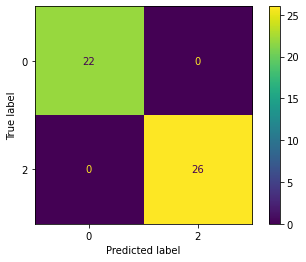

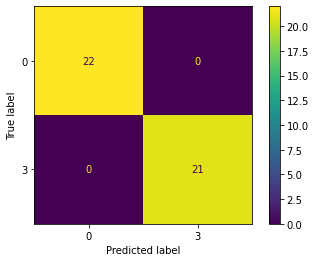

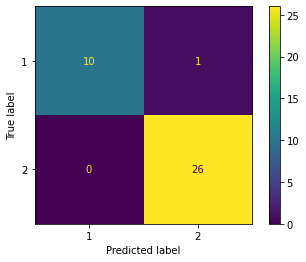

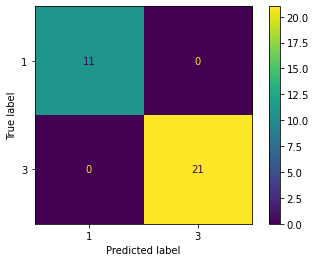

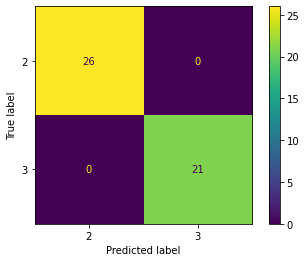

In [38]:
# Making the Confusion Matrix CLF0_1
print('Making the Confusion Matrix CLF0_1')
ConfusionMatrixDisplay.from_estimator(clf_0_1, X_ts0_1,y_ts0_1)
# Making the Confusion Matrix CLF0_2
print('Making the Confusion Matrix CLF0_2')
ConfusionMatrixDisplay.from_estimator(clf_0_2, X_ts0_2, y_ts0_2)
# Making the Confusion Matrix CLF0_3
print('Making the Confusion Matrix CLF0_3')
ConfusionMatrixDisplay.from_estimator(clf_0_3, X_ts0_3, y_ts0_3)
# Making the Confusion Matrix CLF1_2
print('Making the Confusion Matrix CLF1_2')
ConfusionMatrixDisplay.from_estimator(clf_1_2, X_ts1_2, y_ts1_2)
# Making the Confusion Matrix CLF1_3
print('Making the Confusion Matrix CLF1_3')
ConfusionMatrixDisplay.from_estimator(clf_1_3, X_ts1_3, y_ts1_3)
# Making the Confusion Matrix CLF2_3
print('Making the Confusion Matrix CLF2_3')
ConfusionMatrixDisplay.from_estimator(clf_2_3, X_ts2_3, y_ts2_3)

In [39]:
y01_propred = clf_0_1.predict_proba(X_ts)
y02_propred = clf_0_2.predict_proba(X_ts)
y03_propred = clf_0_3.predict_proba(X_ts)
y12_propred = clf_1_2.predict_proba(X_ts)
y13_propred = clf_1_3.predict_proba(X_ts)
y23_propred = clf_2_3.predict_proba(X_ts)

In [40]:
totalP0=((y01_propred[:,0]+y02_propred[:,0]+y03_propred[:,0])/3).reshape(-1,1)
totalP1=((y01_propred[:,1]+y12_propred[:,0]+y13_propred[:,0])/3).reshape(-1,1)
totalP2=((y02_propred[:,1]+y12_propred[:,1]+y23_propred[:,0])/3).reshape(-1,1)
totalP3=((y03_propred[:,1]+y13_propred[:,1]+y23_propred[:,1])/3).reshape(-1,1)

In [41]:
# ARGMAX

yb_all = np.hstack(([totalP0, totalP1, totalP2, totalP3]))
len(yb_all)
m = np.argmax(yb_all, axis=1)

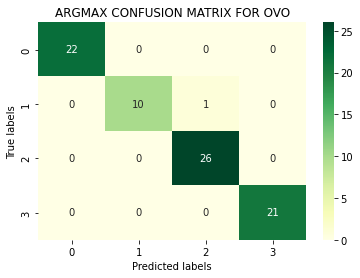

In [42]:
# PLOTING CONFUSION MATRIX

ax= plt.subplot()
cf_matrix = confusion_matrix(y_ts, m)
sns.heatmap(cf_matrix, annot=True, cmap='YlGn')

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('ARGMAX CONFUSION MATRIX FOR OVO'); 


In [43]:
# ARGMAX ACCURACY 

print('Accuracy of Argmax: {:.2f}%'.format(accuracy_score(y_ts, m)*100))


Accuracy of Argmax: 98.75%


In [44]:
# CALLING THE DETECTING THE WRONG CLASS PREDICTION DATA REGARDING POSITION IN TARGET DATA FUNCTION

mout = wrong(m)

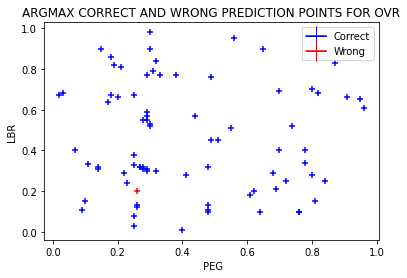

In [45]:
# PLOTING CORRECT AND WRONG PREDICTION POINTS

fig, ax = plt.subplots()
plt.scatter(X_ts[:,0],X_ts[:,1],
             marker="+",c=mout, cmap='bwr')
blue_line = mlines.Line2D([], [], color='blue', marker='+',
                          markersize=20, label='Correct')
red_line = mlines.Line2D([], [], color='red', marker='+',
                          markersize=20, label='Wrong')
plt.title('ARGMAX CORRECT AND WRONG PREDICTION POINTS FOR OVR')
plt.xlabel(' PEG')
plt.ylabel('LBR')
ax.legend(handles=[blue_line ,red_line])
plt.show()